In [106]:
import numpy as np
import pandas as pd
import re
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('records-for-2016.csv')
df.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000


In [108]:
print(df.shape)
print(df.columns)
print(df.info())

(110828, 10)
Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110828 entries, 0 to 110827
Data columns (total 10 columns):
Agency                       110827 non-null object
Create Time                  110827 non-null object
Location                     110828 non-null object
Area Id                      110827 non-null object
Beat                         110247 non-null object
Priority                     110827 non-null float64
Incident Type Id             110827 non-null object
Incident Type Description    110827 non-null object
Event Number                 110827 non-null object
Closed Time                  110827 non-null object
dtypes: float64(1), object(9)
memory usage: 4.7+ MB
None


In [109]:
# def findint(txt):
# #     parameters={'TARA':'1','DROWN':'2','TRUANT':'3','CVLDIS':'4','ODOR':'5','SURNDR':'6','SMOKE':'7','SDESHO':'8','HAZ':'9','HAZMAT':'10','FLOOD':'11','HYDRNT':'12','CKVEH':'13','LOST':'14','CIVIL':'15','AOA':'16','EVAL':'17','EPO':'18','SUSPS':'19','CRSARM':'20','EBMUD':'21','GAS':'22','LSTVEH':'23','NOTIFY':'24','SENILE':'25','FNDGUN':'26','STALL':'27','SIGNAL':'28','OD':'29','UNSEC':'30','MJ':'31','WALKTR':'32','SIDESH':'33','FNDSEN':'34','YELALT':'35','VICTIM':'36','WELCK':'37','ELEC':'38','WIT':'39','SLEEP':'40','PDOA':'41','ENCMP':'42','MPRISK':'43','POWER':'44','EVID':'45','OTC':'46','SECCK':'47','OMC':'48','ABC':'49','AWOL':'50','SUSP':'51','FNDJUV':'52','WIRES':'53','FNDMP':'54','MS':'55','ASSIST':'56','MP':'57','WATER':'58','nan':'0','CHASE':'59'}
#     rg = re.compile('(\\d+)', re.IGNORECASE | re.DOTALL)
#     m = rg.search(txt)
#     if m:
#         return m.group(1)
#     if txt in parameters:
#         return parameters[txt]
    
def timetoday(txt):
    rg = re.compile('([-+]\\d+)', re.IGNORECASE | re.DOTALL)
    m = rg.search(txt)
    if m:
        signed_int1=m.group(1)
        return int(str(signed_int1).replace('-',''))
    else:
        return 0
    
    

In [110]:
#df['Area Id']=[int(str(i).replace('P','').replace('TEC','4').replace('WAG','5').replace('OU','6').replace('CW','7').replace('JLS','8').replace('nan','0')) for i in df['Area Id']]
#df['Incident Type Id']=[int(str(findint(str(i)))) for i in df['Incident Type Id'] ]
#df['Event Number']=[int(str(findint(str(i)))) for i in df['Event Number'] ]
df['Day']=[int(str(timetoday(str(i)))) for i in df['Create Time'] ]



In [111]:

df.describe()

,Priority,Day
count,110827.000000,110828.000000
mean,1.778438,4.063359
std,0.415299,1.982671
min,1.000000,0.000000
25%,2.000000,2.000000
50%,2.000000,4.000000
75%,2.000000,6.000000
max,2.000000,7.000000


In [7]:
df.describe(include=['object', 'bool'])

,Agency,Create Time,Location,Area Id,Beat,Incident Type Id,Incident Type Description,Event Number,Closed Time
count,110827,110827,110828,110827,110247,110827,110827,110827,110827
unique,1,110453,24046,8,58,242,245,110827,110451
top,OP,2016-05-06T11:21:13.000,INTERNATIONAL BLVD,P3,04X,933R,ALARM-RINGER,LOP160529000474,2016-05-29T00:43:38.000
freq,110827,3,2156,47425,4515,10094,10094,1,3


In [131]:
df['Location'].value_counts()

 INTERNATIONAL BLVD              2156
 AV&INTERNATIONAL BLVD           1829
 MACARTHUR BLVD                  1813
 BROADWAY                        1472
 7TH ST                          1223
 FOOTHILL BLVD                   1052
 TELEGRAPH AV                     875
 SAN PABLO AV                     765
 AV&MACARTHUR BLVD                737
 FRUITVALE AV                     709
 BANCROFT AV                      707
 ST&BROADWAY                      691
 HIGH ST                          678
 ST&TELEGRAPH AV                  638
 73RD AV                          595
 HEGENBERGER RD                   591
 AV&FOOTHILL BLVD                 554
 LAKESHORE AV                     509
 WEBSTER ST                       465
 E 12TH ST                        455
 AV&BANCROFT AV                   440
 HARRISON ST                      436
 ST&MARKET ST                     427
 GRAND AV                         416
 MARKET ST                        414
 35TH AV                          408
 ST&MARTIN L

In [127]:
df['Incident Type Id'].value_counts()

933R      10094
415        7883
SECCK      7251
10851      5308
911H       5089
5150       4859
415C       3701
242        3483
912        2583
949        2504
HAZ        2424
243E       2310
WELCK      2276
415GS      2025
901A       1730
602L       1690
211        1592
415TH      1458
943        1288
415N       1287
245        1286
975        1159
415CU      1084
20002      1071
933MA      1061
601R       1024
901        1020
EVAL       1011
CODE7       975
597         810
          ...  
370           3
182           3
529           3
148_5A        3
243           3
203           3
962           3
21235V        3
503           2
484G          2
591           2
WIT           2
140           2
626_6         2
10801         2
10852         2
SUSPS         2
EBMUD         1
OTC           1
DROWN         1
243A          1
3211H         1
YELALT        1
970A          1
ABC           1
955B          1
407           1
300WI         1
487E          1
A487          1
Name: Incident Type Id, 

In [125]:
df['Incident Type Description'].value_counts()

ALARM-RINGER            10094
SECURITY CHECK           7251
STOLEN VEHICLE           5308
911 HANG-UP              5089
MENTALLY ILL             4859
DISTURBING THE PEACE     4840
415 UNKNOWN              3701
BATTERY                  3483
SUSPICIOUS PERSON        2583
SUSPICIOUS VEHICLE       2504
HAZARDOUS SITUATION/     2424
415 FAMILY               2380
BATTERY ON CO-HABITA     2310
WELFARE CHECK -- CHE     2276
415 GUNSHOTS             2025
VEHICLE COLLISION-PE     1730
TRESPASS:                1690
ROBBERY                  1592
415 THREATS              1458
FIGHT                    1288
DISTURBANCE-NEIGHBOR     1287
ASSAULT W/DEADLY WEA     1286
STAND BY AND PRESERV     1159
DISTURBANCE-CUSTOMER     1084
HIT & RUN (PROPERTY      1071
ALARM-MANUALLY ACTIV     1061
RUNAWAY                  1024
EVALUATION               1011
SUBJECT ARMED WITH W      975
VEHICLE COLLISION/PR      882
                        ...  
SCOOTERS INVOLVED IN        3
FALSE PERSONATION OF        3
AGGRAVATED

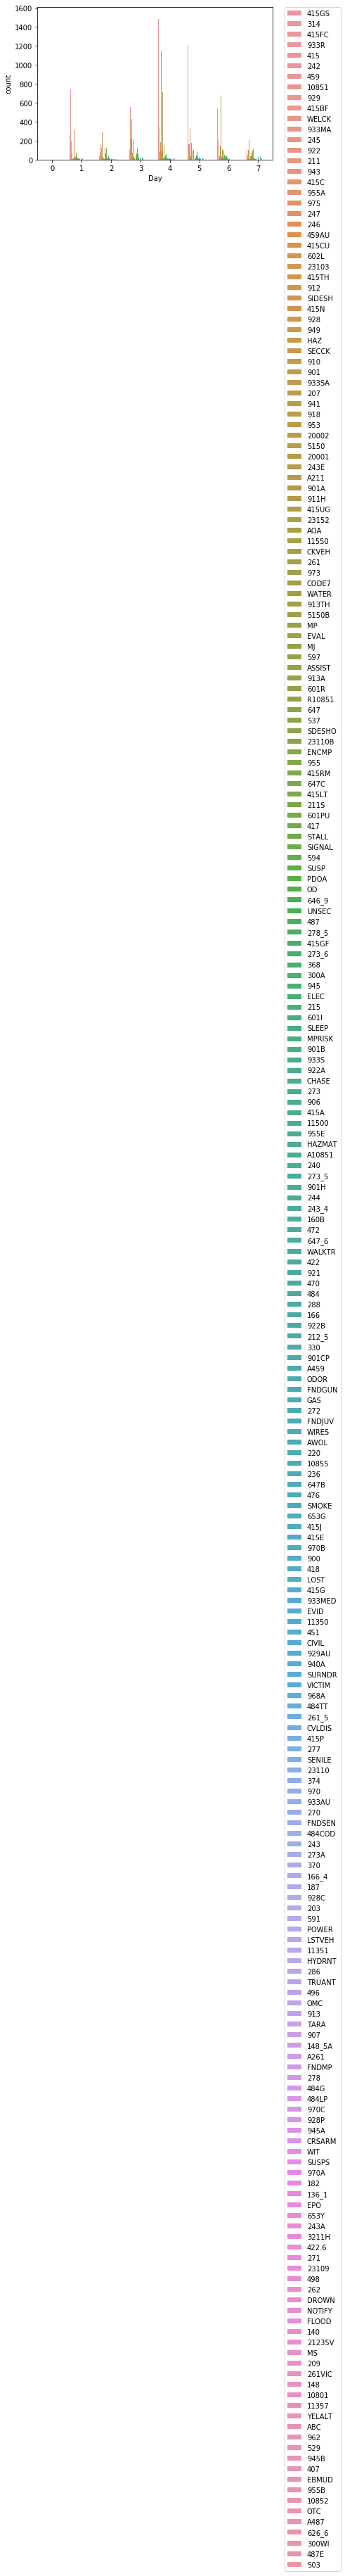

In [124]:
sns.countplot(x="Day", hue=df["Incident Type Id"], data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [13]:
df.sort_values(by='Priority', ascending=False).head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Day
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000,1
68930,OP,2016-05-14T15:46:28.000,E 18TH ST,P2,15X,2.0,415C,415 UNKNOWN,LOP160514000610,2016-05-14T16:35:57.000,5
68942,OP,2016-05-14T16:08:19.000,WY&HIGH ST,P3,26X,2.0,415,DISTURBANCE-DRINKERS,LOP160514000629,2016-05-14T16:49:32.000,5
68940,OP,2016-05-14T16:05:47.000,W GRAND AV,P1,04X,2.0,415C,415 UNKNOWN,LOP160514000624,2016-05-14T17:08:16.000,5
68939,OP,2016-05-14T16:03:29.000,BROADWAY,P1,09X,2.0,ELEC,ELECTRONIC DEVICE,LOP160514000623,2016-05-14T18:07:57.000,5


In [14]:
df.sort_values(by=['Day','Priority'],
        ascending=[True, False]).head(20)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Day
110827,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000,1
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000,1
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000,1
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000,1
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000,1
5,OP,2016-01-01T00:02:55.000,PARK BLVD,P2,16Y,2.0,314,INDECENT EXPOSURE,LOP160101000010,2016-01-01T01:53:59.000,1
6,OP,2016-01-01T00:03:20.000,PIPPIN ST,P3,31Z,2.0,415GS,415 GUNSHOTS,LOP160101000011,2016-01-01T01:11:59.000,1
7,OP,2016-01-01T00:03:32.000,POTTER ST,P3,27X,2.0,415FC,415 FIRE CRACKERS,LOP160101000012,2016-01-01T01:43:12.000,1
8,OP,2016-01-01T00:04:35.000,OUTLOOK AV,P3,30Y,2.0,933R,ALARM-RINGER,LOP160101000014,2016-01-01T00:11:13.000,1
